# House Market

Imagine que você é um investidor imobiliário em King County, USA. Você deseja comprar um casa e revendê-la, obtendo o maior lucro possível. Neste projeto, iremos explorar os dados de vendas de casas na região, com o objetivo de responder às seguintes perguntas:
- Qual casa você deve comprar? Qual o custo estimado de compra?
- Quando a casa deve ser vendida? Por qual valor?
- Você fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

## Data Preprocessing

In [19]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# load the dataset
kc_house_df = pd.read_csv("datasets/kc_house_data.csv")

In [3]:
# lets take a look at our data
kc_house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# dataset columns
kc_house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# look for missing values
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# convert 'date' column to datetime format
kc_house_df["date"] = pd.to_datetime(kc_house_df["date"], format="%Y%m%dT%H%M%S")

In [7]:
kc_house_df["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

## Exploratory Data Analisys (EDA)

### House Location

In [28]:
px.scatter_map(lat=kc_house_df["lat"], lon=kc_house_df["long"], map_style="open-street-map", title="House Prices in King County, WA", zoom=8, height=600, width=800)

In [12]:
# how close to downtown Seattle are the houses?
downtown_seattle = [47.6062, -122.3321] 
kc_house_df["distance_to_downtown"] = np.sqrt((kc_house_df["lat"] - downtown_seattle[0]) ** 2 + (kc_house_df["long"] - downtown_seattle[1]) ** 2)

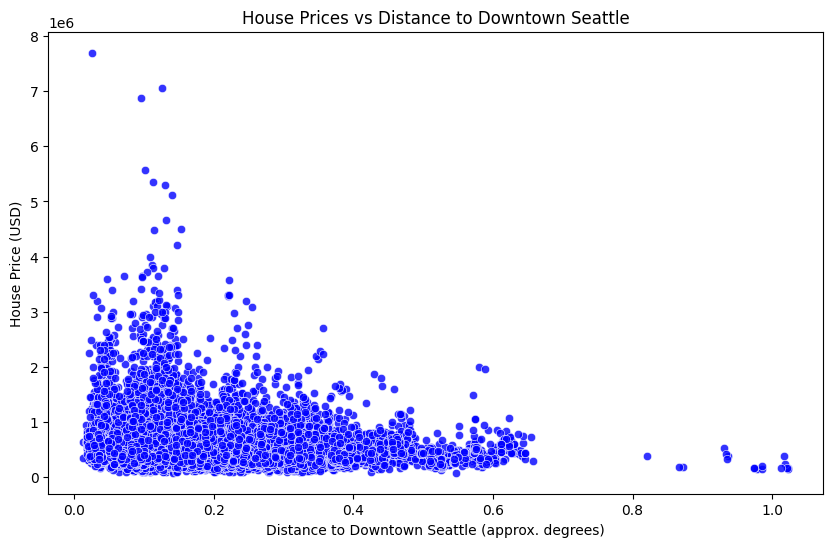

In [35]:
# House Prices vs Distance to Downtown Seattle
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="distance_to_downtown", y="price", alpha=0.8, color="blue")
plt.title("House Prices vs Distance to Downtown Seattle")
plt.xlabel("Distance to Downtown Seattle (approx. degrees)")
plt.ylabel("House Price (USD)")
plt.show()

In [ ]:
# correlation distance to downtown and price
kc_house_df["distance_to_downtown"].corr(kc_house_df["price"])

np.float64(-0.19173026005197702)

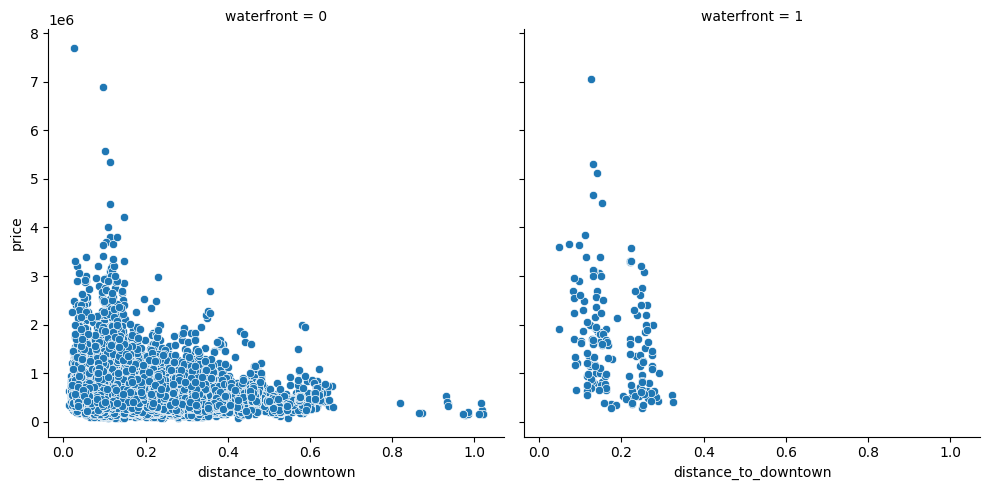

In [ ]:
# waterfront properties vs non-waterfront properties
sns.relplot(
    data=kc_house_df, x="distance_to_downtown", y="price",
    col="waterfront",
    kind="scatter"
)

In [ ]:
# correlation waterfront vs price
kc_house_df["waterfront"].corr(kc_house_df["price"])

np.float64(0.26636943403060226)

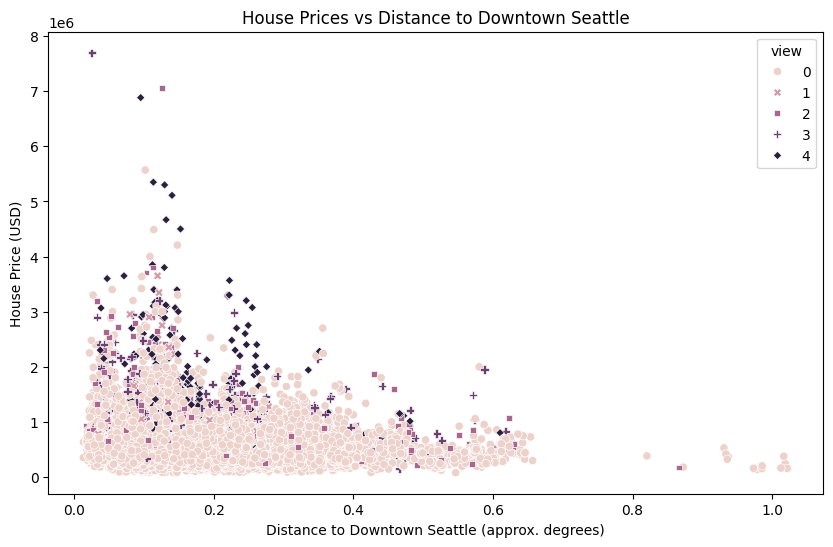

In [ ]:
# how the view impacts house prices?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="distance_to_downtown", y="price", hue="view", style="view")
plt.legend(title="view", loc='upper right')
plt.title("House Prices vs Distance to Downtown Seattle")
plt.xlabel("Distance to Downtown Seattle (approx. degrees)")
plt.ylabel("House Price (USD)")
plt.show()

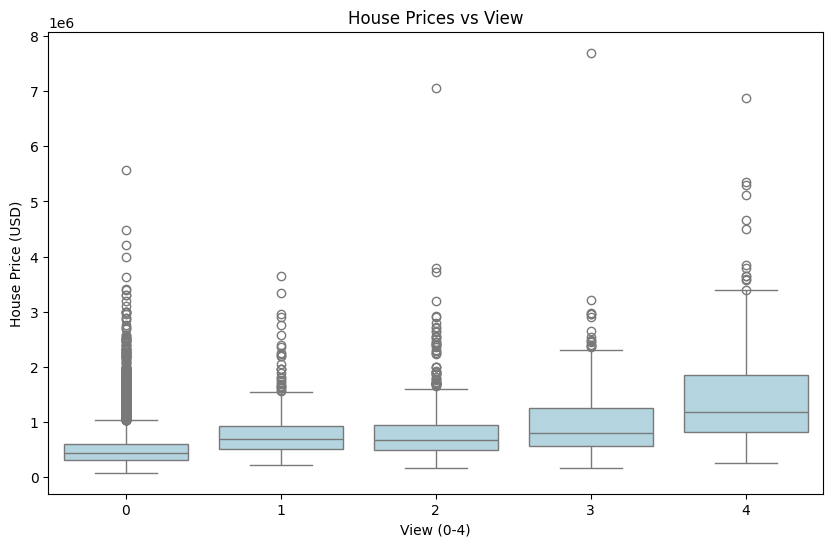

In [65]:
# House Prices vs Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=kc_house_df, x="view", y="price", color="lightblue")
plt.title("House Prices vs View")
plt.xlabel("View (0-4)")
plt.ylabel("House Price (USD)")
plt.show()

In [ ]:
# correlation view vs price
kc_house_df["view"].corr(kc_house_df["price"])

np.float64(0.3972934882945051)

### House Area